In [1]:
import os
import subprocess
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import sys
from bs4 import BeautifulSoup
import re
from word_cluster_dlf import dlf_word_cluster
from word_cluster_mdr import mdr_word_cluster

# Get git root directory
git_root = (
    subprocess.check_output(["git", "rev-parse", "--show-toplevel"], text=True)
    .strip()
)

# Append the git root directory to sys.path
sys.path.append(
    subprocess.check_output("git rev-parse --show-toplevel".split())
    .decode("utf-8")
    .strip()
)

from datahandler.DataHandler import DataHandler

# Set the image directory
image_svg = os.path.join(git_root, "documentation", "images", "svg")
image_png = os.path.join(git_root, "documentation", "images", "png")

os.makedirs(image_svg, exist_ok=True)
os.makedirs(image_png, exist_ok=True)

# Function to extract date from path
def extract_date_from_path(path):
    match = re.search(r'\d{4}-\d{2}-\d{2}', path)
    if match:
        return match.group(0)
    return None

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\felix\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\felix\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
print("STARTING VISUALIZATION")
print("IMAGE OUT DIRECTORY: ", image_svg)
# ---------------------------------------- DATA COLLECTION ---------------------------------------- 
mdr = DataHandler("mdr")
dlf = DataHandler("dlf")

# MDR
mdr_easy_data = mdr.get_all("easy")
mdr_easy_data['source'] = 'mdr'
mdr_easy_data['niveau'] = 'easy'
mdr_hard_data = mdr.get_all("hard")
mdr_hard_data['source'] = 'mdr'
mdr_hard_data['niveau'] = 'hard'
mdr_easy_data['article'] = BeautifulSoup(" ".join(mdr_easy_data["text"].tolist()), 'lxml').get_text()
mdr_hard_data['article'] = BeautifulSoup(" ".join(mdr_hard_data["text"].tolist()), 'lxml').get_text()

# DLF
dlf_easy_data = dlf.get_all("easy")
dlf_easy_data['source'] = 'dlf'
dlf_easy_data['niveau'] = 'easy'
dlf_hard_data = dlf.get_all("hard")
dlf_hard_data['source'] = 'dlf'
dlf_hard_data['niveau'] = 'hard'
dlf_easy_data['article'] = dlf_easy_data['text']
dlf_hard_data['article'] = dlf_hard_data['text']

# JOIN ALL INTO ONE FRAME
all_data = pd.concat([mdr_easy_data, mdr_hard_data, dlf_easy_data, dlf_hard_data])
all_data['has_audio'] = all_data['audio_audio_url'].apply(lambda x : isinstance(x, str))
all_data['has_match'] = all_data['match'].apply(lambda x : isinstance(x, str))

all_data['path_date'] = all_data['path'].apply(extract_date_from_path)
all_data['path_date'] = pd.to_datetime(all_data['path_date'], errors='coerce')

all_data = all_data.replace([np.inf, -np.inf], np.nan)

# calculate article length in words
all_data['article_length'] = all_data['article'].apply(lambda x : len(re.findall(r'\w+', x)))
all_data['article_length'].fillna(all_data['article_length'].median(), inplace=True)

all_data.drop(columns=['audio_audio_url', 'audio_download_url', 'audio_duration', 'text', 'match', 'date'], inplace=True)

all_data

STARTING VISUALIZATION
IMAGE OUT DIRECTORY:  C:/Users/felix/OneDrive/Vorlesungen/6_Semester/KIP/KIP_EinfachErklaert\documentation\images\svg


,title,description,kicker,url,image_url,image_description,path,source,niveau,article,audio,has_audio,has_match,path_date,article_length
0,Die Landes-Regierung von Sachsen will den Obst...,\nDie letzten Jahre waren sehr schwer:<br/> ...,Sachsen,https://www.mdr.de/nachrichten-leicht/leichte-...,https://cdn.mdr.de/nachrichten/sachsen/frost-w...,Frostschäden an einem Weinstock.,C:/Users/felix/OneDrive/Vorlesungen/6_Semester...,mdr,easy,Die letzten Jahre waren sehr schwer: • Für ...,NaN,True,False,2024-06-05,7733
0,Ein Opfer vom Blitz-Einschlag in Dresden ist g...,\nVor einigen Wochen gab es ein Gewitter in de...,Sachsen,https://www.mdr.de/nachrichten-leicht/leichte-...,https://cdn.mdr.de/nachrichten/sachsen/dresden...,Verletzte nach Blitzeinschlag in Dresden,C:/Users/felix/OneDrive/Vorlesungen/6_Semester...,mdr,easy,Die letzten Jahre waren sehr schwer: • Für ...,NaN,True,False,2024-06-05,7733
0,In Erfurt fängt ein Festival für Puppen-Theate...,"\nErfurt ist eine große Stadt in dem <a href=""...",Thüringen,https://www.mdr.de/nachrichten-leicht/leichte-...,https://cdn.mdr.de/kultur/bild-37636-resimage_...,"Internationales Puppentheaterfestival Erfurt ""...",C:/Users/felix/OneDrive/Vorlesungen/6_Semester...,mdr,easy,Die letzten Jahre waren sehr schwer: • Für ...,NaN,True,False,2024-06-05,7733
0,In der Stadt Merseburg wurde eine Bombe gefunden,"\nDer Saalekreis ist ein <a href=""https://www....",Sachsen-Anhalt,https://www.mdr.de/nachrichten-leicht/leichte-...,https://cdn.mdr.de/nachrichten/sachsen-anhalt/...,Eine Straße in der Merseburger Innenstadt ist ...,C:/Users/felix/OneDrive/Vorlesungen/6_Semester...,mdr,easy,Die letzten Jahre waren sehr schwer: • Für ...,NaN,True,True,2024-06-05,7733
0,Der Haupt-Bahnhof von Dresden ist bald für 3 T...,\nIm Haupt-Bahnhof von der Stadt Dresden gibt ...,Sachsen,https://www.mdr.de/nachrichten-leicht/leichte-...,https://cdn.mdr.de/nachrichten/sachsen/dresden...,Bauarbeiten an der Kreuzungsbrücke Hauptbahnho...,C:/Users/felix/OneDrive/Vorlesungen/6_Semester...,mdr,easy,Die letzten Jahre waren sehr schwer: • Für ...,NaN,True,True,2024-06-06,7733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,G7-Gipfel erzielt Einigung zu Milliarden-Kredi...,Die sieben führenden Industriestaaten haben si...,Russischer Angriffskrieg,https://www.deutschlandfunk.de/g7-gipfel-erzie...,https://bilder.deutschlandfunk.de/ad/28/16/4f/...,Die G7-Staaten wollen die Ukraine in ihrem Kam...,C:/Users/felix/OneDrive/Vorlesungen/6_Semester...,dlf,hard,Das Geld kann für Waffenkäufe verwendet werden...,NaN,False,False,2024-06-13,421
0,NATO-Staaten einigen sich auf Plan zur langfri...,Die NATO-Staaten haben sich offenbar auf einen...,Brüssel,https://www.deutschlandfunk.de/nato-staaten-ei...,https://bilder.deutschlandfunk.de/b8/49/1b/1b/...,Das Treffen der der Ukraine-Verteidigungskonta...,C:/Users/felix/OneDrive/Vorlesungen/6_Semester...,dlf,hard,NATO-Generalsekretär Stoltenberg sagte in Brüs...,NaN,False,False,2024-06-13,113
0,Post darf Briefe langsamer zustellen,Die Post soll künftig mehr Zeit für die Beförd...,Erste Postgesetz-Novelle seit 26 Jahren,https://www.deutschlandfunk.de/post-darf-brief...,https://bilder.deutschlandfunk.de/2c/70/8f/e1/...,Briefe dürfen künftig später zugestellt werden...,C:/Users/felix/OneDrive/Vorlesungen/6_Semester...,dlf,hard,"Die Ampel-Fraktionen von SPD, Grünen und FDP s...",NaN,False,False,2024-06-13,321
0,Supreme Court lehnt Klagen gegen Abtreibungspi...,In den USA erhalten Frauen weiterhin Zugang zu...,USA,https://www.deutschlandfunk.de/supreme-court-l...,https://bilder.deutschlandfunk.de/15/a0/d8/d9/...,Das Abtreibungsmedikament Mifepristone. (AP / ...,C:/Users/felix/OneDrive/Vorlesungen/6_Semester...,dlf,hard,Das oberste US-Gericht lehnte Klagen gegen die...,NaN,False,False,2024-06-13,133


c:\Users\felix\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\felix\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


VISUALIZATION FINISHED


<Figure size 640x480 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x1400 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

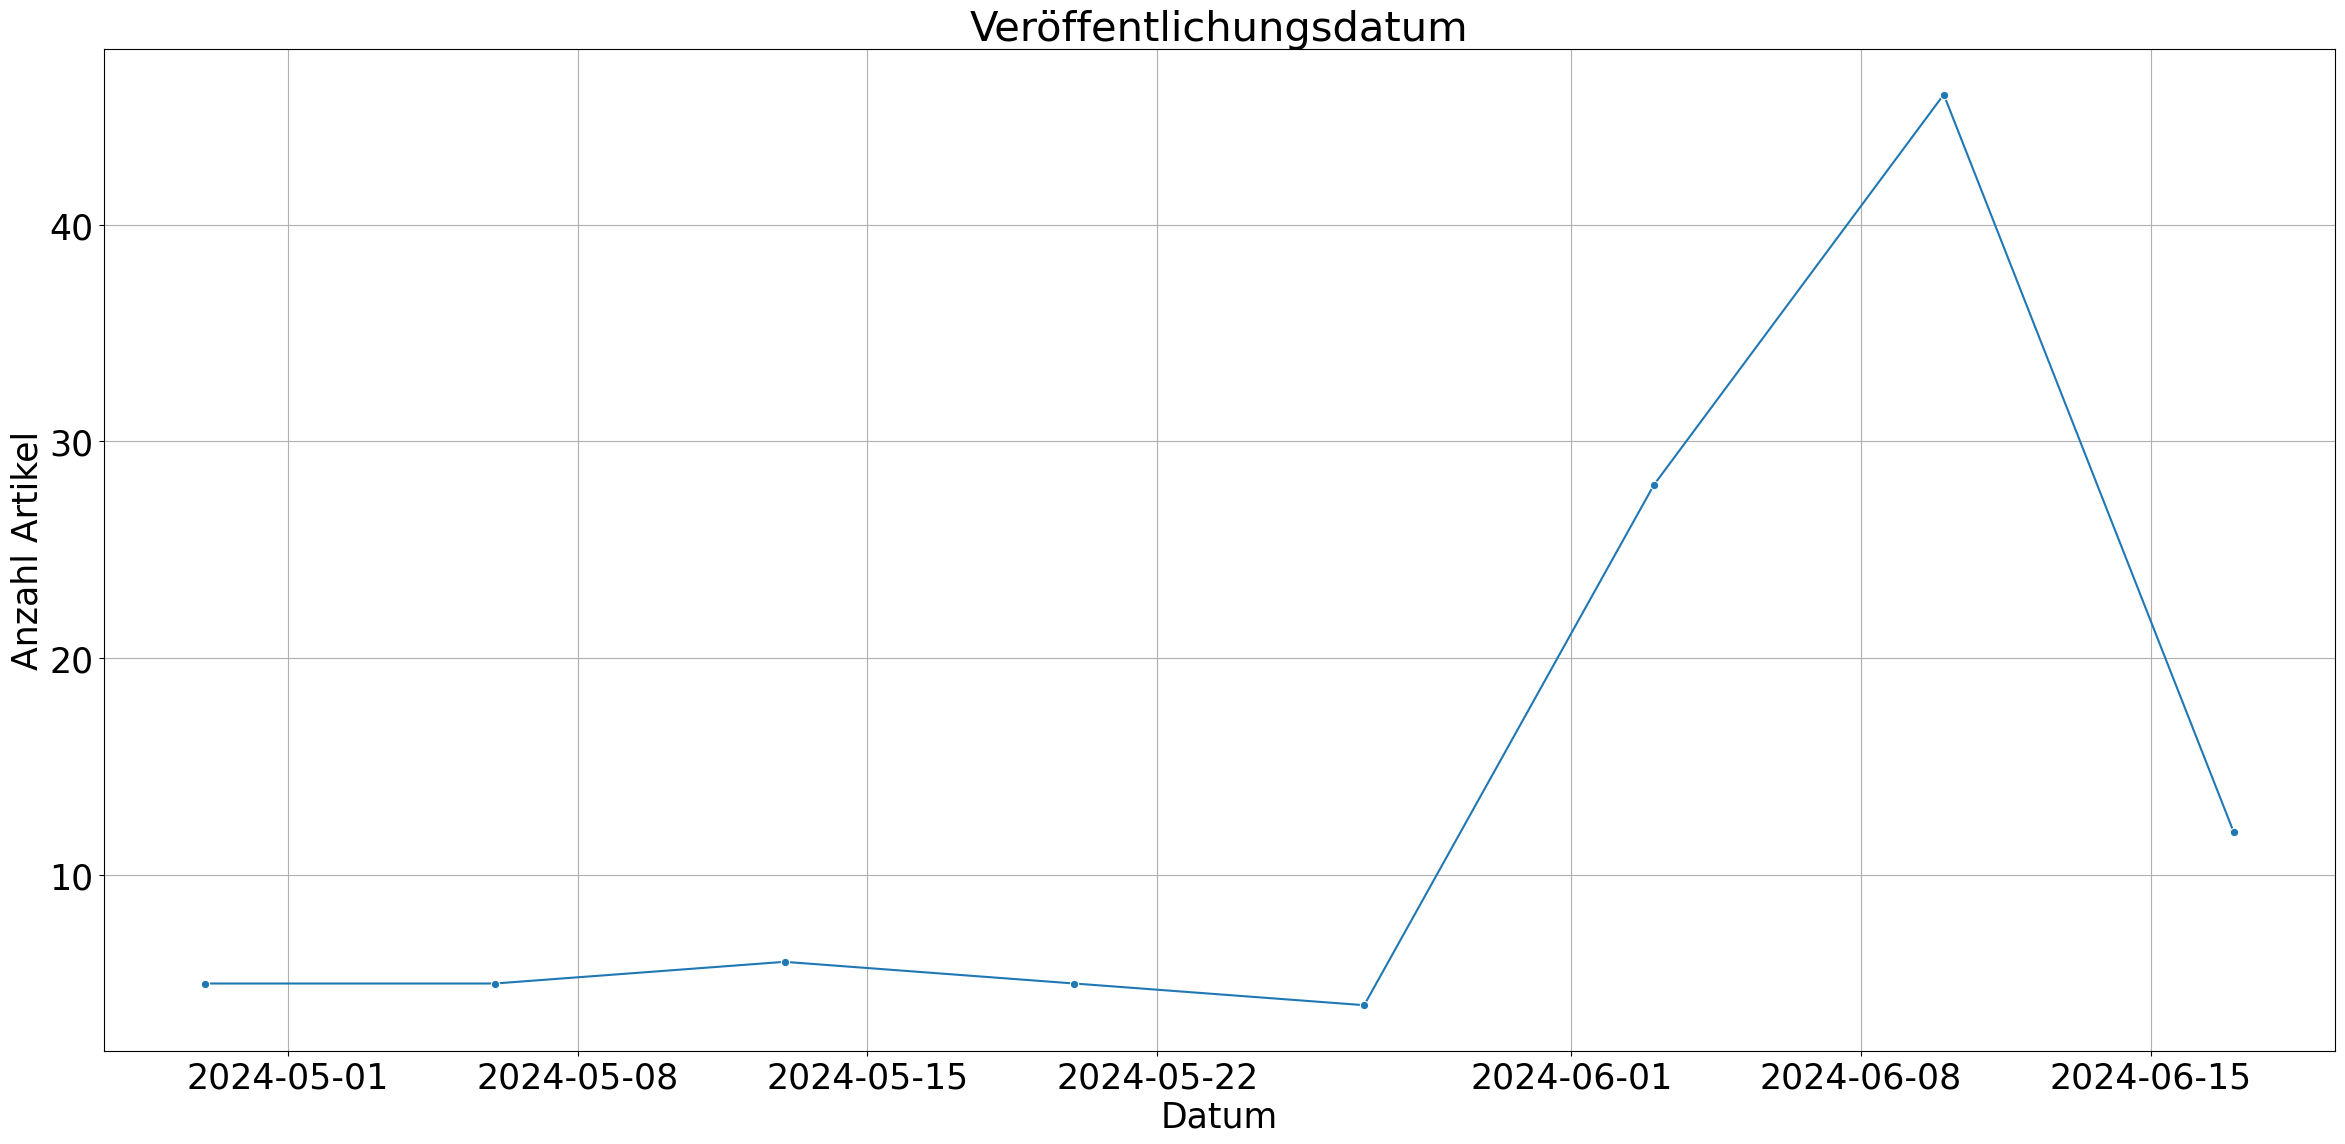

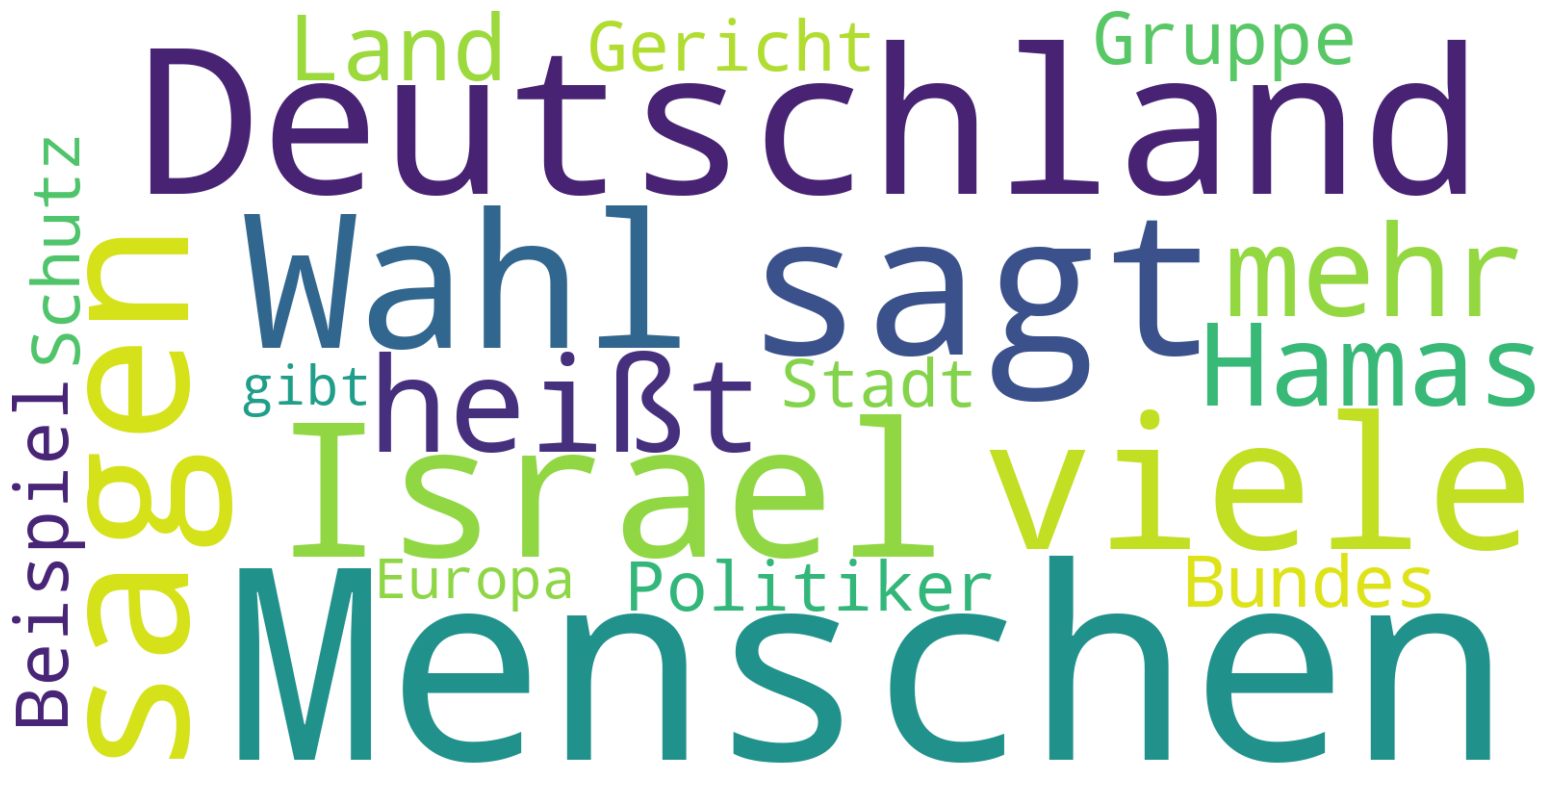

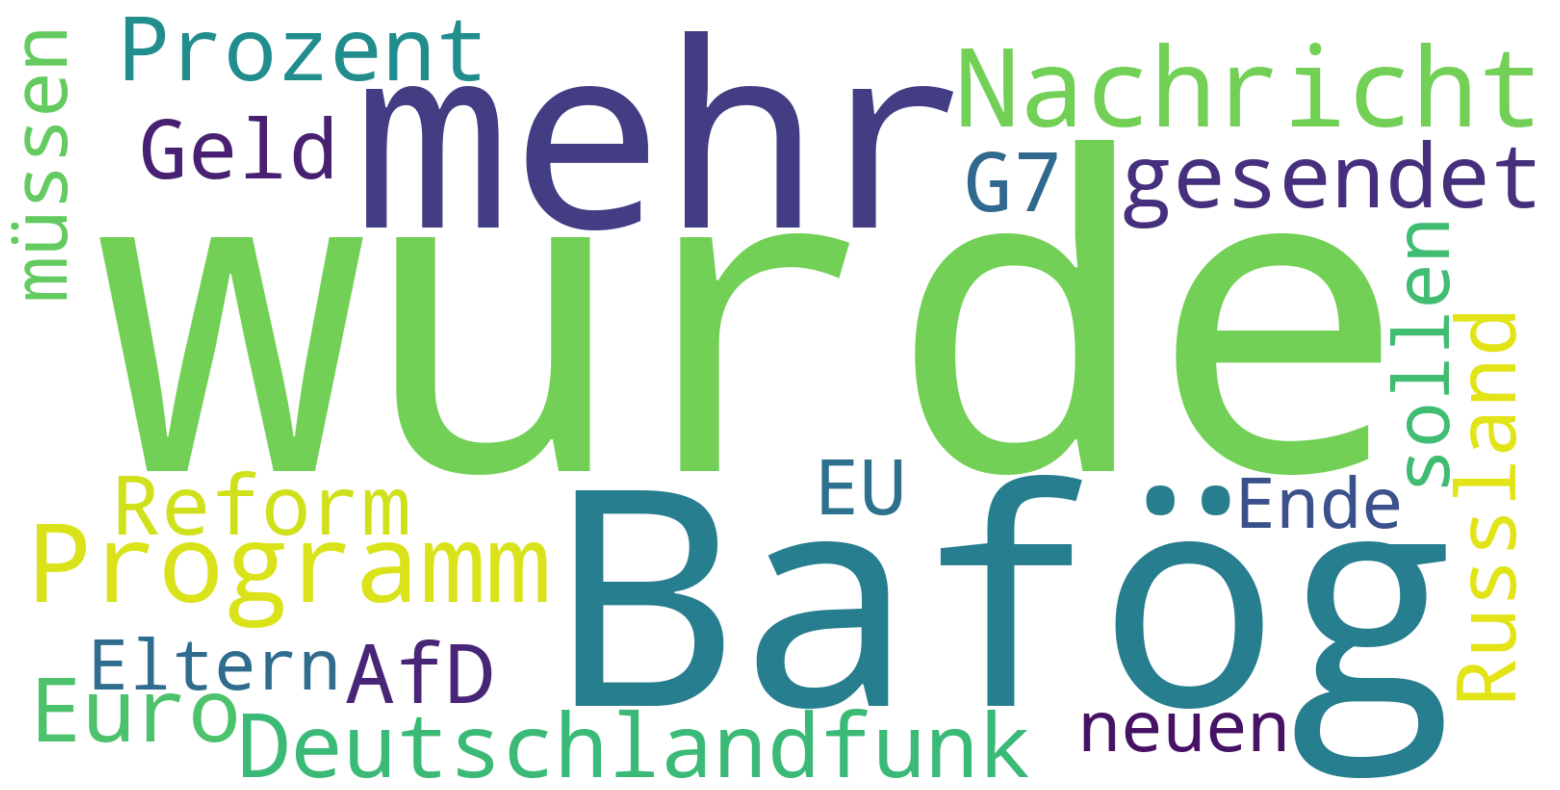

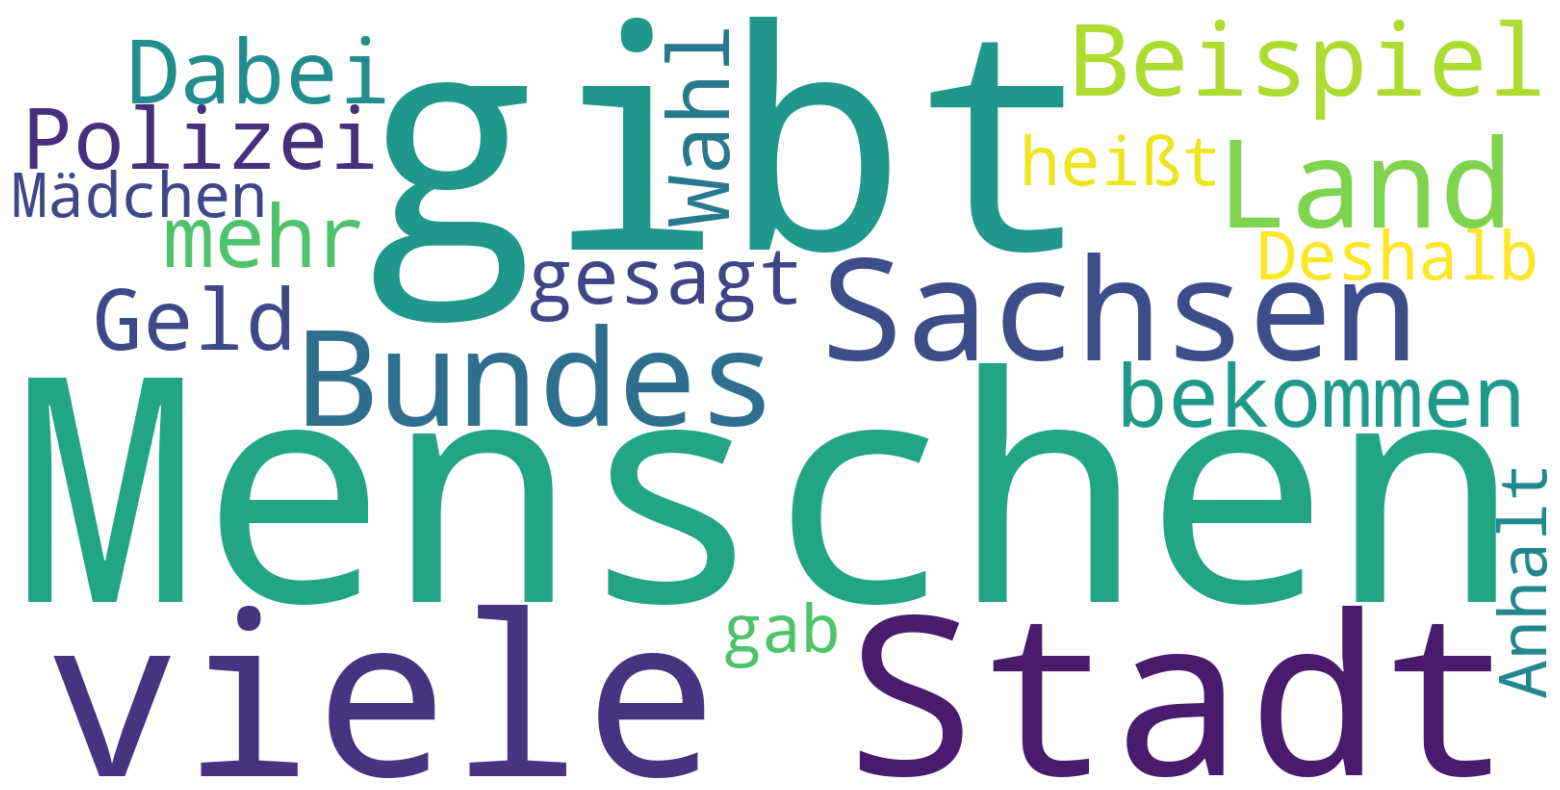

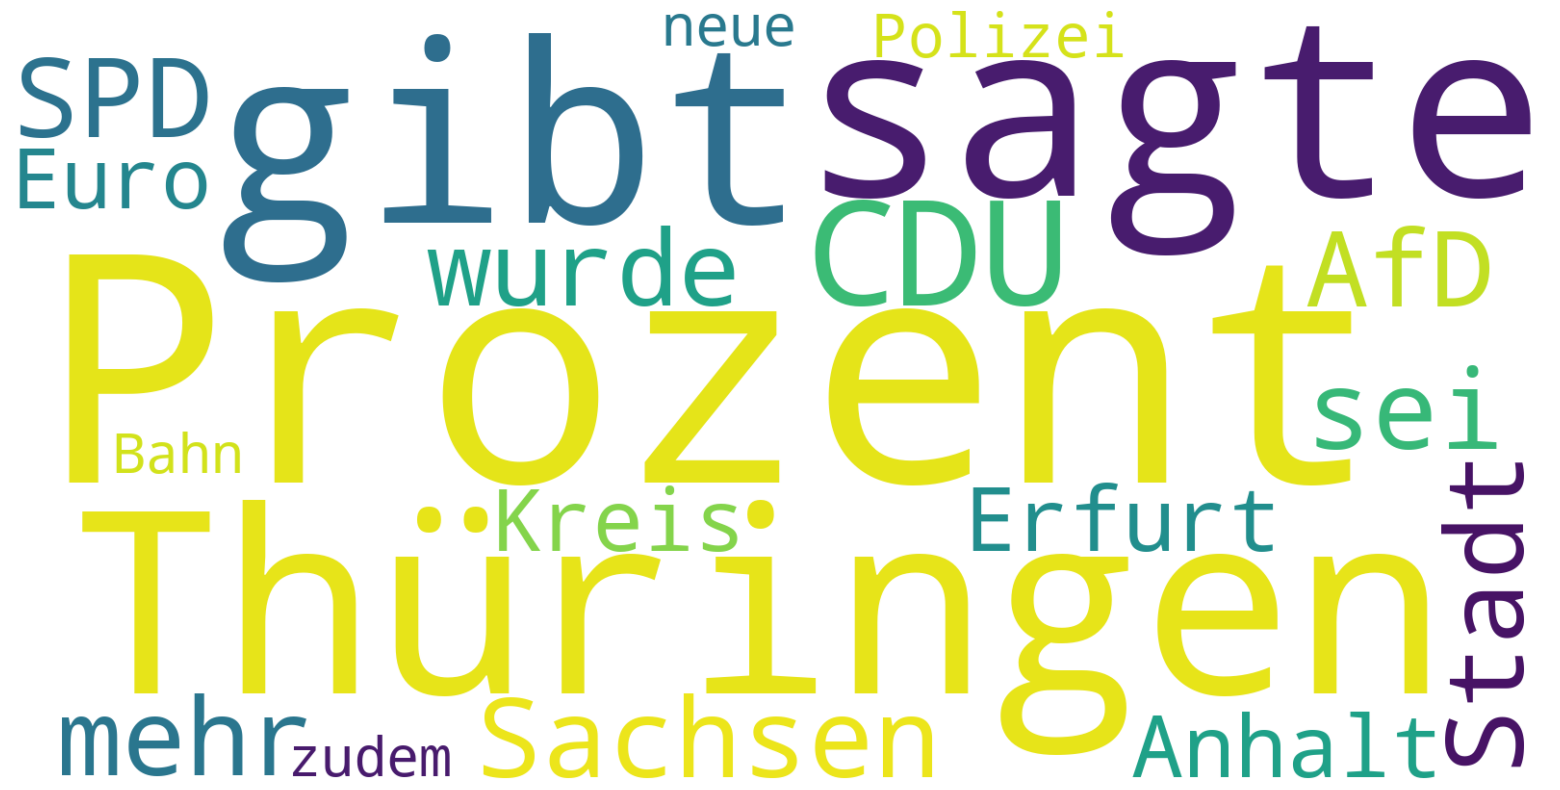

In [3]:

# ---------------------------------------- VISUALIZATION ---------------------------------------- 
# Adjusting font sizes
plt.rcParams.update({'font.size': 25})  # Set the global font size

# Add the text to the plot
plt.text(0.5, 0.5, f"Anzahl der Artikel {all_data.shape[0]}", fontsize=24, ha='center', va='center')
plt.axis('off')
plt.savefig(os.path.join(image_png, 'text_plot.png'), bbox_inches='tight')

plt.axis('on')
plt.clf()

# ---------------------------------------- CAKES ---------------------------------------- 
# x3 cakes
fig, axs = plt.subplots(1, 3, figsize=(18, 8))

# Number of articles by difficulty
articles_by_niveau = all_data['niveau'].value_counts()
axs[0].pie(articles_by_niveau, labels=articles_by_niveau.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
axs[0].set_title('Nach Schwierigkeit', fontsize=30)

# Number of articles by source
articles_by_source = all_data['source'].value_counts()
axs[1].pie(articles_by_source, labels=articles_by_source.index, autopct='%1.1f%%', colors=['#ffcc99','#c2c2f0','#ffb3e6'])
axs[1].set_title('Artikel nach Quelle', fontsize=30)

# Number of articles with audio
articles_with_audio = all_data['has_audio'].value_counts()
articles_with_audio.index = ['ohne', 'mit']
axs[2].pie(articles_with_audio, labels=articles_with_audio.index, autopct='%1.1f%%', colors=['#c2f0c2','#ff6666'])
axs[2].set_title('Artikel mit Audio', fontsize=30)

plt.tight_layout()
plt.savefig(os.path.join(image_svg, 'cakes_x3.svg'))
plt.savefig(os.path.join(image_svg, 'cakes_x3.png'))
plt.clf() 

# x4 cakes
fig, axs = plt.subplots(2, 2, figsize=(18, 14))

# Number of articles by difficulty
articles_by_niveau = all_data['niveau'].value_counts()
axs[0, 0].pie(articles_by_niveau, labels=articles_by_niveau.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
axs[0, 0].set_title('Nach Schwierigkeit')

# Number of articles by source
articles_by_source = all_data['source'].value_counts()
axs[0, 1].pie(articles_by_source, labels=articles_by_source.index, autopct='%1.1f%%', colors=['#ffcc99','#c2c2f0','#ffb3e6'])
axs[0, 1].set_title('Artikel nach Quelle')

# Number of articles with audio
articles_with_audio = all_data['has_audio'].value_counts()
articles_with_audio.index = ['ohne', 'mit']
axs[1, 0].pie(articles_with_audio, labels=articles_with_audio.index, autopct='%1.1f%%', colors=['#c2f0c2','#ff6666'])
axs[1, 0].set_title('Artikel mit Audio')

# Number of articles with match
articles_with_audio = all_data['has_match'].value_counts()
articles_with_audio.index = ['ohne', 'mit']
axs[1, 1].pie(articles_with_audio, labels=articles_with_audio.index, autopct='%1.1f%%', colors=['#66b3ff','#ffcc99'])
axs[1, 1].set_title('Artikel mit Match')

plt.tight_layout()
plt.savefig(os.path.join(image_svg, 'cakes_x4.svg'))
plt.savefig(os.path.join(image_png, 'cakes_x4.png'))
plt.clf() 


# ---------------------------------------- LENGTH BOXPLOT ---------------------------------------- 
plt.figure(figsize=(16, 12))  
sns.boxplot(x='niveau', y='article_length', data=all_data, palette='pastel')
plt.title('Wörter pro Artikel')
plt.xlabel('Sprachniveau')
plt.ylabel('Wörter')
plt.tight_layout()  # Adjust the layout
plt.savefig(os.path.join(image_svg, 'box_plot_length.svg'))
plt.savefig(os.path.join(image_png, 'box_plot_length.png'))
plt.clf()

# ---------------------------------------- ERSCHEINUNGSDATUM ---------------------------------------- 
all_data['path_date'] = pd.to_datetime(all_data['path_date'])
articles_over_time = all_data.groupby(all_data['path_date'].dt.to_period('W')).size().reset_index(name='count')
articles_over_time['path_date'] = articles_over_time['path_date'].dt.to_timestamp()

plt.figure(figsize=(24, 12))
sns.lineplot(x='path_date', y='count', data=articles_over_time, marker='o', linestyle='-')
plt.title('Veröffentlichungsdatum')
plt.xlabel('Datum')
plt.ylabel('Anzahl Artikel')
plt.grid(True)
plt.tight_layout()

plt.savefig(os.path.join(image_svg, 'articles_over_time.svg'))
plt.savefig(os.path.join(image_png, 'articles_over_time.png'))
# ---------------------------------------- WORD CLUSTER ----------------------------------------
dlf_word_cluster()
mdr_word_cluster()

print("VISUALIZATION FINISHED")